# (Multivariate) Gaussian Bayes (Quadratic Discriminant Analysis, QDA) on Different Distribution Data

In [1]:
from sklearn.datasets import make_blobs, make_circles, make_classification, make_moons, make_gaussian_quantiles
from matplotlib import pyplot as plt
import numpy as np

# Create Datasets from Scikit-Learn

In [2]:
samples = 200

datasets = [
    make_blobs(n_samples=samples, centers=2, n_features=2, random_state=1),
    make_blobs(n_samples=samples, centers=2, n_features=2, random_state=6),
    make_moons(n_samples=samples, noise=0.15, random_state=0),
    make_circles(n_samples=samples, noise=0.15, factor=0.3, random_state=0),
    make_gaussian_quantiles(n_samples=samples, n_features=2, n_classes=2, random_state=0),
    make_classification(n_samples=samples, n_features=2, random_state=1, n_redundant=0, n_informative=1, n_clusters_per_class=1),
    make_classification(n_samples=samples, n_features=2, random_state=1, n_redundant=0, n_informative=2, n_clusters_per_class=1),
    make_classification(n_samples=samples, n_features=2, random_state=1, n_redundant=0, n_informative=2),
    make_blobs(n_samples=samples, centers=3, n_features=2, random_state=1),
    make_blobs(n_samples=samples, centers=4, n_features=2, random_state=6),
    make_gaussian_quantiles(n_samples=samples, n_features=2, n_classes=3, random_state=0),
    make_gaussian_quantiles(n_samples=samples, n_features=2, n_classes=4, random_state=0),
]

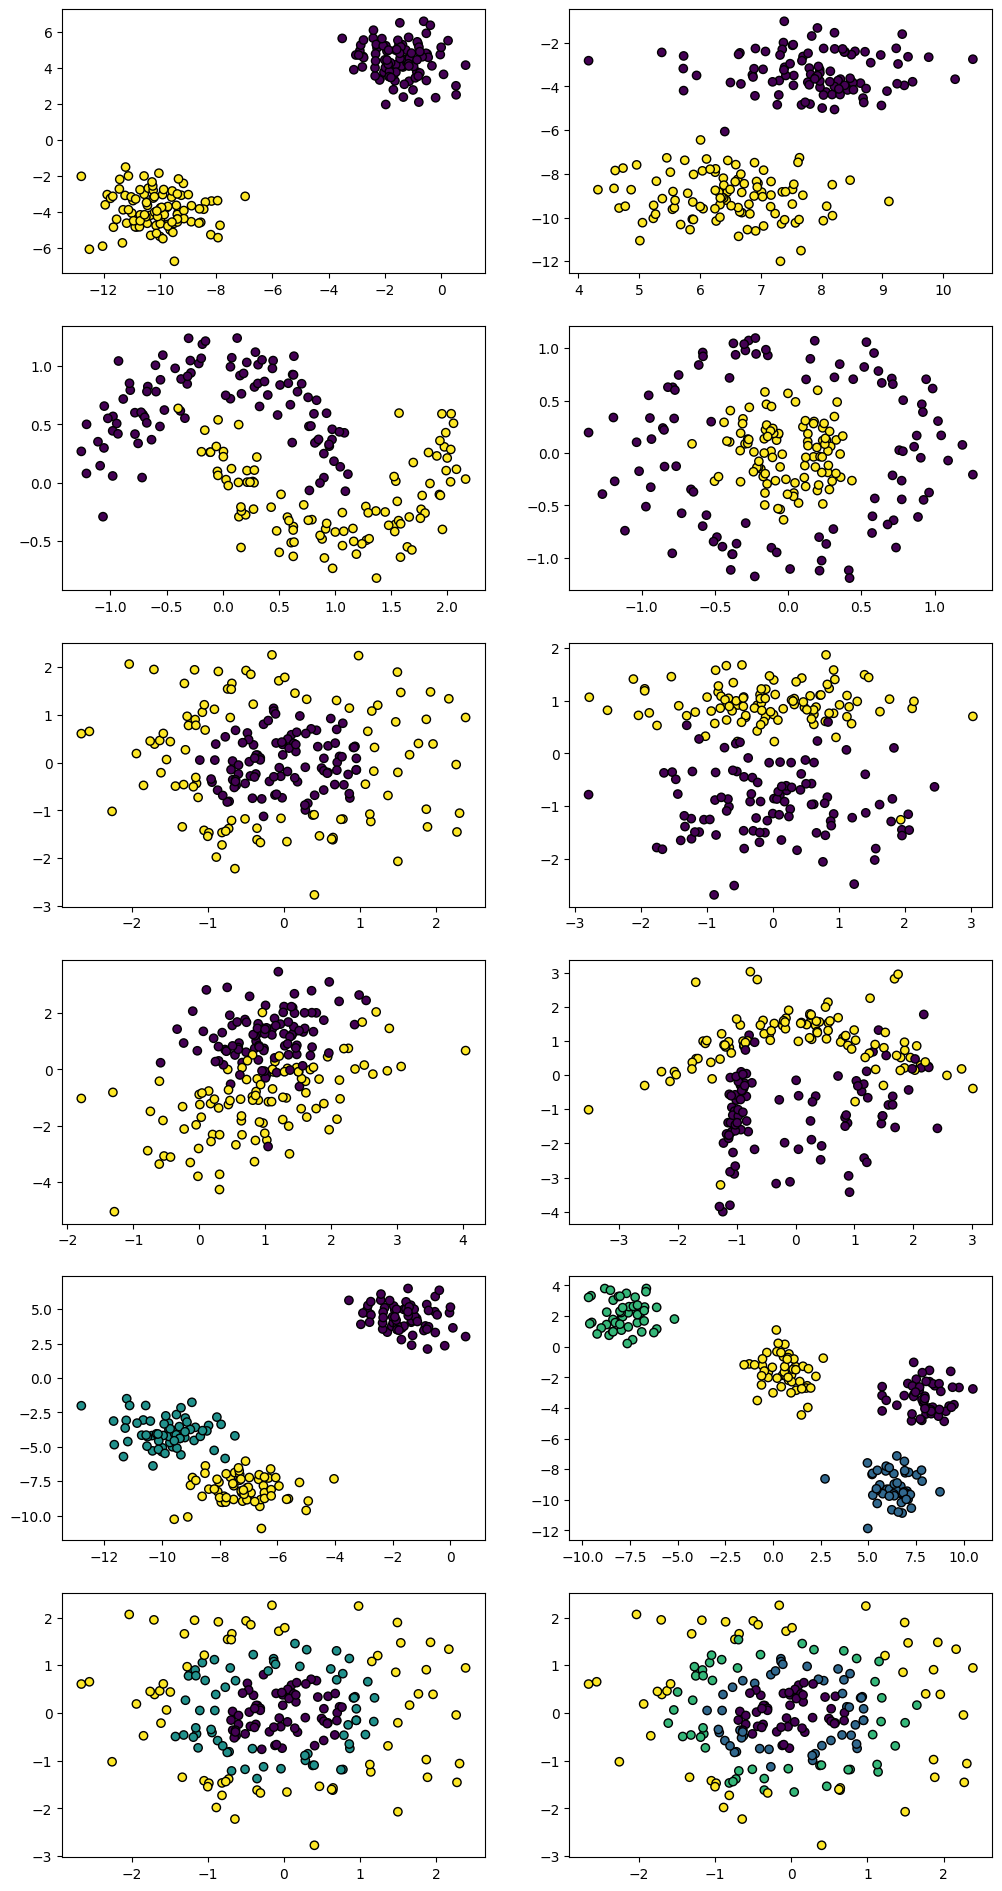

In [3]:
col = 2
row = int(len(datasets)/col)
plt.subplots(row, col, figsize=(12, 24))
for i in range(col):
    for j in range(row):
        X = datasets[row*i+j][0]
        y = datasets[row*i+j][1]
        plt.subplot(row, col, row*i+j+1)
        plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k")

# Build MGB(Multivariate Gaussian Bayes) Classifier Model

In [4]:
class MGB:
    def __init__(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        self.label, self.p_y = np.unique(y, return_counts=True)
        self.p_y =  self.p_y.astype(float) / np.sum(self.p_y)
        self.avg = np.zeros((len(self.label), len(self.X.T)))
        self.cov = np.zeros((len(self.label), len(self.X.T), len(self.X.T)))
        
    def train(self):
        for i in range(len(self.label)):
            for j in range(len(self.X.T)):
                self.avg[i][j] = np.average(self.X[:,j][self.y==self.label[i]]) #µ
                self.cov[i] = np.cov(self.X[self.y==self.label[i]].T) #Σ
        
    def probability(self, x, avg, cov):
        return (1/np.power(2*np.pi, len(self.label)/2))*(1/np.power(np.linalg.det(cov), 1/2))*np.exp((-1/2)*np.dot(np.dot((x-avg).T, np.linalg.inv(cov)), (x-avg)))
        
    def pred(self, x):
        y_pred = np.array([])
        for d in range(1 if x.ndim == 1 else len(x)):
            p_X_y = np.ones(len(self.label))
            p_y_X = np.ones(len(self.label))
            for i in range(len(self.label)):
                p_X_y[i] = self.probability(x if x.ndim == 1 else x[d], self.avg[i], self.cov[i])
            p_X = np.sum(p_X_y*self.p_y)
            p_y_X = p_X_y*self.p_y/p_X
            y_pred = np.append(y_pred, self.label[np.argmax(p_y_X)])
        return y_pred
    
    def valid(self):
        accuracy = np.sum(self.y==self.pred(self.X))/len(self.X)
        return accuracy
    
    def plot(self):
        interval = np.linalg.norm(np.array([np.max(self.X[:,0])-np.min(self.X[:,0]), np.max(self.X[:,1])-np.min(self.X[:,1])]))/(len(self.X)*1.2)
        x1 = np.arange(np.min(self.X[:,0]), np.max(self.X[:,0])+interval, interval)
        x2 = np.arange(np.min(self.X[:,1]), np.max(self.X[:,1])+interval, interval)
        x1, x2 = np.meshgrid(x1, x2)
        mesh_X = np.array([x1.flatten(), x2.flatten()]).T
        y_ = self.pred(mesh_X)
        
        plt.scatter(mesh_X[:,0], mesh_X[:,1], c=y_, alpha=0.02)
        plt.scatter(self.X[:,0], self.X[:,1], c=y, edgecolor="k")
        #plt.show()

# Plot the results

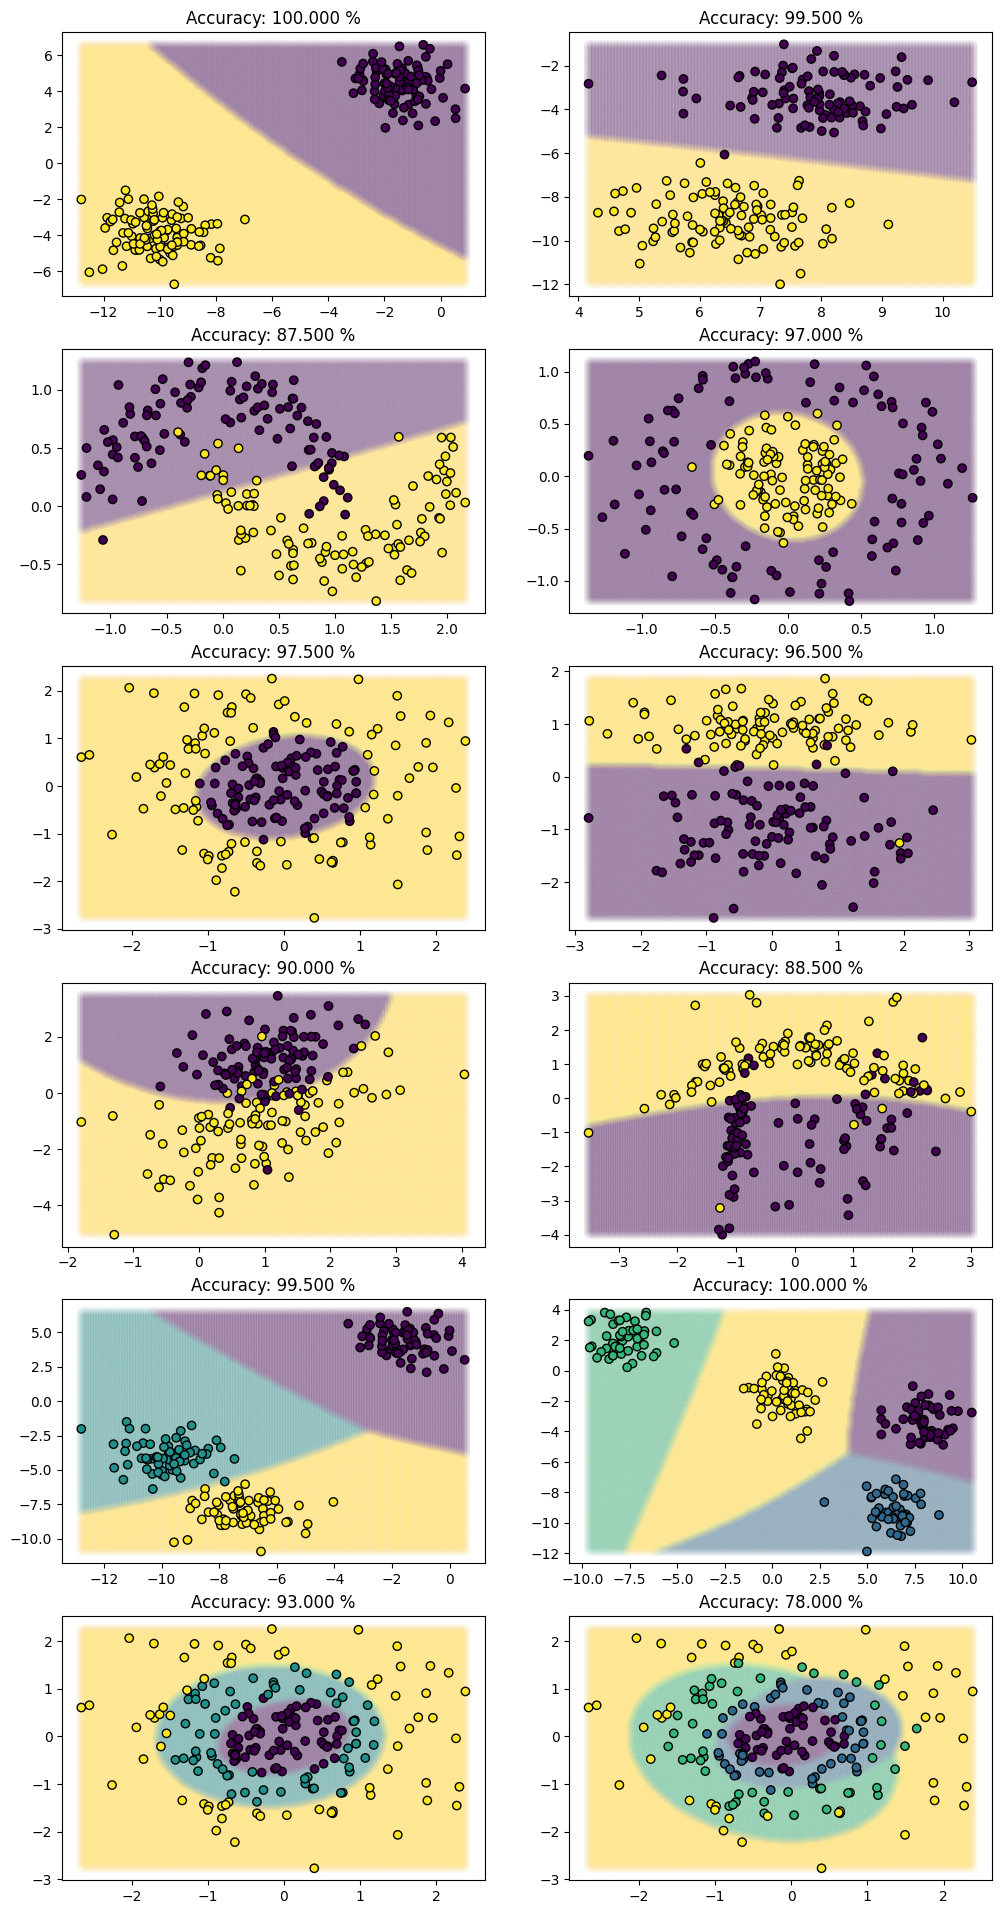

In [5]:
col = 2
row = int(len(datasets)/col)
plt.subplots(row, col, figsize=(12, 24))
for i in range(col):
    for j in range(row):
        X = datasets[row*i+j][0]
        y = datasets[row*i+j][1]
        
        plt.subplot(row, col, row*i+j+1)
        model = MGB(X, y)
        model.train()
        plt.title(f"Accuracy: {model.valid()*100:.3f} %")
        model.plot()

# Plot the results from Scikit-Learn

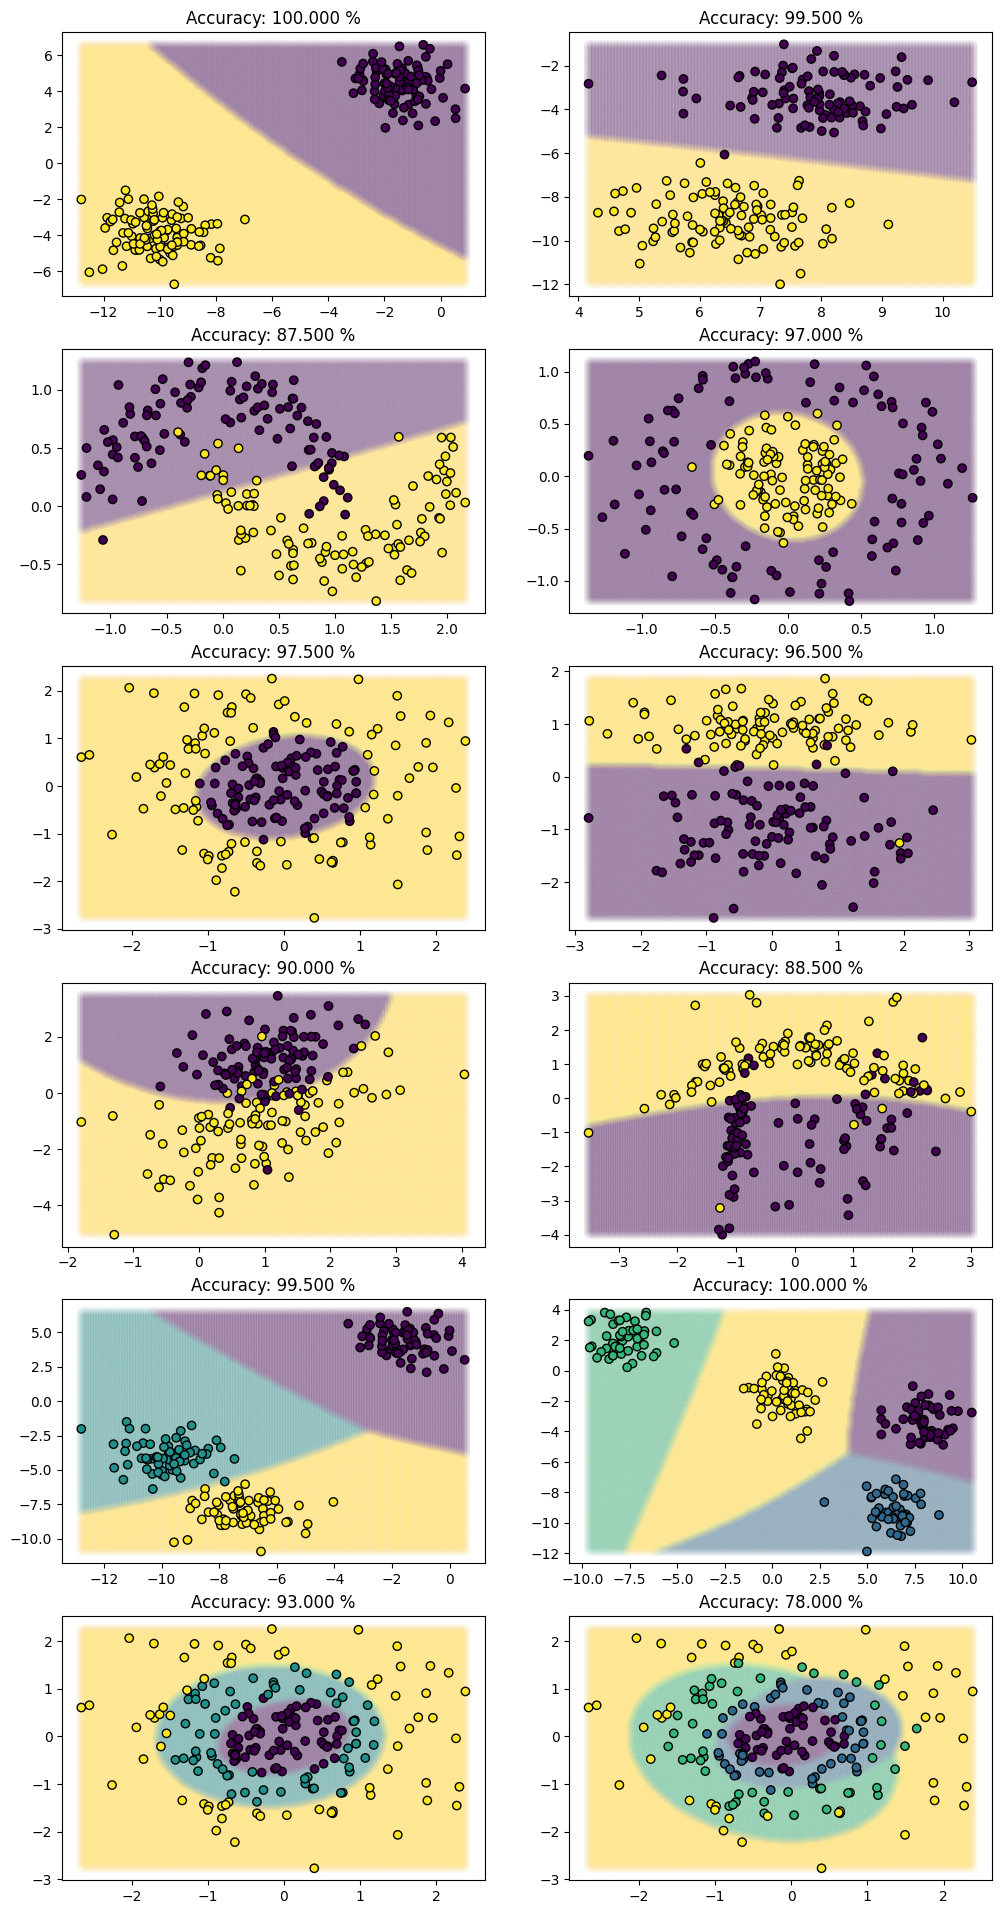

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifier = QuadraticDiscriminantAnalysis(store_covariance=True)

col = 2
row = int(len(datasets)/col)
plt.subplots(row, col, figsize=(12, 24))
for i in range(col):
    for j in range(row):
        X = datasets[row*i+j][0]
        y = datasets[row*i+j][1]
        
        classifier.fit(X, y)
        
        plt.subplot(row, col, row*i+j+1)
        interval = np.linalg.norm(np.array([np.max(X[:,0])-np.min(X[:,0]), np.max(X[:,1])-np.min(X[:,1])]))/(len(X)*1.2)
        x1 = np.arange(np.min(X[:,0]), np.max(X[:,0])+interval, interval)
        x2 = np.arange(np.min(X[:,1]), np.max(X[:,1])+interval, interval)
        x1, x2 = np.meshgrid(x1, x2)
        mesh_X = np.array([x1.flatten(), x2.flatten()]).T
        
        y_ = classifier.predict(mesh_X)
        
        plt.title(f"Accuracy: {classifier.score(X, y)*100:.3f} %")
        plt.scatter(mesh_X[:,0], mesh_X[:,1], c=y_, alpha=0.02)
        plt.scatter(X[:,0], X[:,1], c=y, edgecolor="k")